# **15, 30, 45개 자산 추출(Chat GPT-4)**

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [15]:
# 15개 자산 티커 빈도 확인

file_path = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/SnP/15개 자산 티커.xlsx'

# 엑셀 파일 읽기
try:
    data = pd.read_excel(file_path)
except Exception as e:
    data = str(e)

# 티커들의 빈도수 확인 및 빈도수대로 정렬
ticker_frequency = data['MSFT'].value_counts().sort_values(ascending=False)

top_15_tickers = ticker_frequency.head(15).index.tolist()

print(top_15_tickers)


['AAPL', 'AMZN', 'NVDA', 'JPM', 'PG', 'PFE', 'JNJ', 'KO', 'XOM', 'NEE', 'GOOGL', 'MSFT', 'TSLA', 'NKE', 'BAC']


In [16]:
# 30개 자산 티커 빈도 확인

file_path = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/SnP/30개 자산 티커.xlsx'  

try:
    data = pd.read_excel(file_path)
except Exception as e:
    print(e) 

# 모든 열에 대해 티커의 빈도수를 계산하고, 합산하여 전체 빈도수를 계산
ticker_frequency = data.apply(pd.value_counts).sum(axis=1).sort_values(ascending=False)

# 가장 빈도가 높은 상위 30개의 티커를 리스트로 추출
top_30_tickers = ticker_frequency.head(30).index.tolist()

print(top_30_tickers)

['MSFT', 'AMZN', 'JNJ', 'PFE', 'JPM', 'NVDA', 'AAPL', 'CAT', 'CVX', 'NKE', 'PG', 'GS', 'NEE', 'KO', 'MRK', 'TSLA', 'BA', 'VZ', 'GOOGL', 'CRM', 'ADBE', 'UNH', 'WMT', 'QCOM', 'BRK.B', 'V', 'ABT', 'MCD', 'INTC', 'XOM']


## **GPT-weighted portfolios' cumulative returns (In-sample period)**

In [3]:
new_market = pd.read_csv('./new_market.csv')

#15개 자산 pfo

# 자산 비중
stocks_15 = {
    "AAPL": 0.084,
    "AMZN": 0.074,
    "NVDA": 0.064,
    "JPM": 0.054,
    "PG": 0.054,
    "PFE": 0.064,
    "JNJ": 0.064,
    "KO": 0.054,
    "XOM": 0.064,
    "NEE": 0.074,
    "GOOGL": 0.084,
    "MSFT": 0.084,
    "TSLA": 0.074,
    "NKE": 0.054,
    "BAC": 0.054
}

# 날짜 범위 설정
start_date = '2018-05-01'
end_date = '2023-04-30'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
new_market['pricingDate'] = pd.to_datetime(new_market['pricingDate'])
filtered_data = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data = filtered_data[['pricingDate'] + list(stocks_15.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns = selected_data.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_15 = daily_returns.dot(pd.Series(stocks_15))

# 누적 수익률 계산
cumulative_returns_15 = (1 + portfolio_returns_15).cumprod()

# 마지막 5개 누적 수익률 출력
cumulative_returns_15.tail()

pricingDate
2023-04-24    2.802663
2023-04-25    2.757832
2023-04-26    2.749661
2023-04-27    2.808527
2023-04-28    2.823722
dtype: float64

In [6]:
#주간수익률

# 자산 비중
stocks_15 = {
    "AAPL": 0.084,
    "AMZN": 0.074,
    "NVDA": 0.064,
    "JPM": 0.054,
    "PG": 0.054,
    "PFE": 0.064,
    "JNJ": 0.064,
    "KO": 0.054,
    "XOM": 0.064,
    "NEE": 0.074,
    "GOOGL": 0.084,
    "MSFT": 0.084,
    "TSLA": 0.074,
    "NKE": 0.054,
    "BAC": 0.054
}

# 날짜 범위 설정
start_date = '2018-05-01'
end_date = '2023-04-30'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
new_market['pricingDate'] = pd.to_datetime(new_market['pricingDate'])
filtered_data = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data = filtered_data[['pricingDate'] + list(stocks_15.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns = selected_data.pct_change().dropna()

# 포트폴리오의 일일 수익률 계산
portfolio_daily_returns = daily_returns.dot(pd.Series(stocks_15))

# 주간 수익률 계산 (매주 금요일 기준)
weekly_returns_gpt_15 = portfolio_daily_returns.resample('W-FRI').apply(lambda x: (1 + x).prod() - 1)

weekly_returns_gpt_15 = pd.DataFrame(weekly_returns_gpt_15, columns=['GPT-weighted_15'])

In [37]:
#30개 자산 pfo

stocks_30 = {
    "MSFT": 0.067,
    "AMZN": 0.067,
    "NVDA": 0.067,
    "AAPL": 0.067,
    "GOOGL": 0.067,
    "ADBE": 0.067,
    "JNJ": 0.05,
    "PFE": 0.05,
    "MRK": 0.05,
    "ABT": 0.05,
    "PG": 0.05,
    "KO": 0.05,
    "JPM": 0.05,
    "GS": 0.05,
    "CAT": 0.025,
    "CVX": 0.025,
    "XOM": 0.025,
    "BA": 0.025,
    "TSLA": 0.025,
    "NEE": 0.025,
    "NKE": 0.005,
    "VZ": 0.005,
    "CRM": 0.005,
    "UNH": 0.005,
    "WMT": 0.005,
    "QCOM": 0.005,
    "BAC": 0.005,
    "V": 0.005,
    "MCD": 0.005,
    "INTC": 0.005
}


start_date = '2018-05-01'
end_date = '2023-04-30'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
filtered_data_30 = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data_30 = filtered_data_30[['pricingDate'] + list(stocks_30.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data_30.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns_30 = selected_data_30.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_30 = daily_returns_30.dot(pd.Series(stocks_30))

# 누적 수익률 계산
cumulative_returns_30 = (1 + portfolio_returns_30).cumprod()

# 마지막 5개 누적 수익률 출력
cumulative_returns_30.tail()

pricingDate
2023-04-24    2.473306
2023-04-25    2.438118
2023-04-26    2.432981
2023-04-27    2.477888
2023-04-28    2.491082
dtype: float64

In [7]:
#주간수익률

# 자산 비중
stocks_30 = {
    "MSFT": 0.067,
    "AMZN": 0.067,
    "NVDA": 0.067,
    "AAPL": 0.067,
    "GOOGL": 0.067,
    "ADBE": 0.067,
    "JNJ": 0.05,
    "PFE": 0.05,
    "MRK": 0.05,
    "ABT": 0.05,
    "PG": 0.05,
    "KO": 0.05,
    "JPM": 0.05,
    "GS": 0.05,
    "CAT": 0.025,
    "CVX": 0.025,
    "XOM": 0.025,
    "BA": 0.025,
    "TSLA": 0.025,
    "NEE": 0.025,
    "NKE": 0.005,
    "VZ": 0.005,
    "CRM": 0.005,
    "UNH": 0.005,
    "WMT": 0.005,
    "QCOM": 0.005,
    "BAC": 0.005,
    "V": 0.005,
    "MCD": 0.005,
    "INTC": 0.005
}

# 날짜 범위 설정
start_date = '2018-05-01'
end_date = '2023-04-30'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
new_market['pricingDate'] = pd.to_datetime(new_market['pricingDate'])
filtered_data = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data = filtered_data[['pricingDate'] + list(stocks_30.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns = selected_data.pct_change().dropna()

# 포트폴리오의 일일 수익률 계산
portfolio_daily_returns = daily_returns.dot(pd.Series(stocks_30))

# 주간 수익률 계산 (매주 금요일 기준)
weekly_returns_gpt_30 = portfolio_daily_returns.resample('W-FRI').apply(lambda x: (1 + x).prod() - 1)

weekly_returns_gpt_30 = pd.DataFrame(weekly_returns_gpt_30, columns=['GPT-weighted_30'])

In [38]:
# 45개 자산 pfo

stocks_45 = {
    "AAPL": 0.05, "GOOGL": 0.04, "MSFT": 0.04, "NVDA": 0.03, "AMD": 0.03, "ORCL": 0.02, "CRM": 0.02, "INTC": 0.01, "CSCO": 0.01,
    "JPM": 0.04, "GS": 0.03, "BAC": 0.03, "MS": 0.02, "AXP": 0.02, "C": 0.01,
    "JNJ": 0.03, "UNH": 0.03, "PFE": 0.02, "ABBV": 0.02, "MRK": 0.02, "AMGN": 0.02, "GILD": 0.01,
    "PG": 0.03, "KO": 0.03, "NKE": 0.02, "PEP": 0.02, "COST": 0.02, "WMT": 0.02, "TGT": 0.01,
    "XOM": 0.025, "CVX": 0.025, "NEE": 0.02, "DUK": 0.01, "SO": 0.01, "SLB": 0.01,
    "MMM": 0.02, "CAT": 0.02, "HON": 0.02, "GE": 0.02, "ADP": 0.02,
    "AMZN": 0.02, "META": 0.02, "HD": 0.02, "VZ": 0.01, "MRK": 0.01
}

start_date = '2018-05-01'
end_date = '2023-04-30'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
filtered_data_45 = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data_45 = filtered_data_45[['pricingDate'] + list(stocks_45.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data_45.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns_45 = selected_data_45.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_45 = daily_returns_45.dot(pd.Series(stocks_45))

# 누적 수익률 계산
cumulative_returns_45 = (1 + portfolio_returns_45).cumprod()

# 마지막 5개 누적 수익률 출력
cumulative_returns_45.tail()

pricingDate
2023-04-24    2.202853
2023-04-25    2.173148
2023-04-26    2.162323
2023-04-27    2.198515
2023-04-28    2.214047
dtype: float64

In [8]:
#주간수익률

# 자산 비중
stocks_45 = {
    "AAPL": 0.05, "GOOGL": 0.04, "MSFT": 0.04, "NVDA": 0.03, "AMD": 0.03, "ORCL": 0.02, "CRM": 0.02, "INTC": 0.01, "CSCO": 0.01,
    "JPM": 0.04, "GS": 0.03, "BAC": 0.03, "MS": 0.02, "AXP": 0.02, "C": 0.01,
    "JNJ": 0.03, "UNH": 0.03, "PFE": 0.02, "ABBV": 0.02, "MRK": 0.02, "AMGN": 0.02, "GILD": 0.01,
    "PG": 0.03, "KO": 0.03, "NKE": 0.02, "PEP": 0.02, "COST": 0.02, "WMT": 0.02, "TGT": 0.01,
    "XOM": 0.025, "CVX": 0.025, "NEE": 0.02, "DUK": 0.01, "SO": 0.01, "SLB": 0.01,
    "MMM": 0.02, "CAT": 0.02, "HON": 0.02, "GE": 0.02, "ADP": 0.02,
    "AMZN": 0.02, "META": 0.02, "HD": 0.02, "VZ": 0.01, "MRK": 0.01
}

# 날짜 범위 설정
start_date = '2018-05-01'
end_date = '2023-04-30'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
new_market['pricingDate'] = pd.to_datetime(new_market['pricingDate'])
filtered_data = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data = filtered_data[['pricingDate'] + list(stocks_45.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns = selected_data.pct_change().dropna()

# 포트폴리오의 일일 수익률 계산
portfolio_daily_returns = daily_returns.dot(pd.Series(stocks_45))

# 주간 수익률 계산 (매주 금요일 기준)
weekly_returns_gpt_45 = portfolio_daily_returns.resample('W-FRI').apply(lambda x: (1 + x).prod() - 1)

weekly_returns_gpt_45 = pd.DataFrame(weekly_returns_gpt_45, columns=['GPT-weighted_45'])

## **Equally-weighted (GPT-weighted) portfolios' cumulative returns (In-sample period)**

In [39]:
#15개 자산 pfo_equal

stocks_15_equal = {
    "AAPL": 0.06666666666666667,
    "AMZN": 0.06666666666666667,
    "NVDA": 0.06666666666666667,
    "JPM": 0.06666666666666667,
    "PG": 0.06666666666666667,
    "PFE": 0.06666666666666667,
    "JNJ": 0.06666666666666667,
    "KO": 0.06666666666666667,
    "XOM": 0.06666666666666667,
    "NEE": 0.06666666666666667,
    "GOOGL": 0.06666666666666667,
    "MSFT": 0.06666666666666667,
    "TSLA": 0.06666666666666667,
    "NKE": 0.06666666666666667,
    "BAC": 0.06666666666666667
}


start_date = '2018-05-01'
end_date = '2023-04-30'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
filtered_data_15_equal = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data_15_equal = filtered_data_15_equal[['pricingDate'] + list(stocks_15_equal.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data_15_equal.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns_15_equal = selected_data_15_equal.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_15_equal = daily_returns_15_equal.dot(pd.Series(stocks_15_equal))

# 누적 수익률 계산
cumulative_returns_15_equal = (1 + portfolio_returns_15_equal).cumprod()

# 마지막 5개 누적 수익률 출력
cumulative_returns_15_equal.tail()


pricingDate
2023-04-24    2.692567
2023-04-25    2.650286
2023-04-26    2.638553
2023-04-27    2.690547
2023-04-28    2.706117
dtype: float64

In [40]:
#30개 자산 pfo_equal

stocks_30_equal = {
    "MSFT": 0.03333333333333333,
    "AMZN": 0.03333333333333333,
    "NVDA": 0.03333333333333333,
    "AAPL": 0.03333333333333333,
    "GOOGL": 0.03333333333333333,
    "ADBE": 0.03333333333333333,
    "JNJ": 0.03333333333333333,
    "PFE": 0.03333333333333333,
    "MRK": 0.03333333333333333,
    "ABT": 0.03333333333333333,
    "PG": 0.03333333333333333,
    "KO": 0.03333333333333333,
    "JPM": 0.03333333333333333,
    "GS": 0.03333333333333333,
    "CAT": 0.03333333333333333,
    "CVX": 0.03333333333333333,
    "XOM": 0.03333333333333333,
    "BA": 0.03333333333333333,
    "TSLA": 0.03333333333333333,
    "NEE": 0.03333333333333333,
    "NKE": 0.03333333333333333,
    "VZ": 0.03333333333333333,
    "CRM": 0.03333333333333333,
    "UNH": 0.03333333333333333,
    "WMT": 0.03333333333333333,
    "QCOM": 0.03333333333333333,
    "BAC": 0.03333333333333333,
    "V": 0.03333333333333333,
    "MCD": 0.03333333333333333,
    "INTC": 0.03333333333333333
}


start_date = '2018-05-01'
end_date = '2023-04-30'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
filtered_data_30_equal = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data_30_equal = filtered_data_30_equal[['pricingDate'] + list(stocks_30_equal.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data_30_equal.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns_30_equal = selected_data_30_equal.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_30_equal = daily_returns_30_equal.dot(pd.Series(stocks_30_equal))

# 누적 수익률 계산
cumulative_returns_30_equal = (1 + portfolio_returns_30_equal).cumprod()

# 마지막 5개 누적 수익률 출력
cumulative_returns_30_equal.tail()


pricingDate
2023-04-24    2.248950
2023-04-25    2.217973
2023-04-26    2.204004
2023-04-27    2.241243
2023-04-28    2.260197
dtype: float64

In [41]:
# 45개 자산 pfo_equal

stocks_45_equal = {
    "AAPL": 0.022222,
    "GOOGL": 0.022222,
    "MSFT": 0.022222,
    "NVDA": 0.022222,
    "AMD": 0.022222,
    "ORCL": 0.022222,
    "CRM": 0.022222,
    "INTC": 0.022222,
    "CSCO": 0.022222,
    "JPM": 0.022222,
    "GS": 0.022222,
    "BAC": 0.022222,
    "MS": 0.022222,
    "AXP": 0.022222,
    "C": 0.022222,
    "JNJ": 0.022222,
    "UNH": 0.022222,
    "PFE": 0.022222,
    "ABBV": 0.022222,
    "MRK": 0.022222,
    "AMGN": 0.022222,
    "GILD": 0.022222,
    "PG": 0.022222,
    "KO": 0.022222,
    "NKE": 0.022222,
    "PEP": 0.022222,
    "COST": 0.022222,
    "WMT": 0.022222,
    "TGT": 0.022222,
    "XOM": 0.022222,
    "CVX": 0.022222,
    "NEE": 0.022222,
    "DUK": 0.022222,
    "SO": 0.022222,
    "SLB": 0.022222,
    "MMM": 0.022222,
    "CAT": 0.022222,
    "HON": 0.022222,
    "GE": 0.022222,
    "ADP": 0.022222,
    "AMZN": 0.022222,
    "META": 0.022222,
    "HD": 0.022222,
    "VZ": 0.022222,
    "MRK": 0.022222,
}

start_date = '2018-05-01'
end_date = '2023-04-30'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
filtered_data_45_equal = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data_45_equal = filtered_data_45_equal[['pricingDate'] + list(stocks_45_equal.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data_45_equal.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns_45_equal = selected_data_45_equal.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_45_equal = daily_returns_45_equal.dot(pd.Series(stocks_45_equal))

# 누적 수익률 계산
cumulative_returns_45_equal = (1 + portfolio_returns_45_equal).cumprod()

# 마지막 5개 누적 수익률 출력
cumulative_returns_45_equal.tail()

pricingDate
2023-04-24    2.041475
2023-04-25    2.014496
2023-04-26    1.998202
2023-04-27    2.030711
2023-04-28    2.045260
dtype: float64

[*********************100%%**********************]  1 of 1 completed


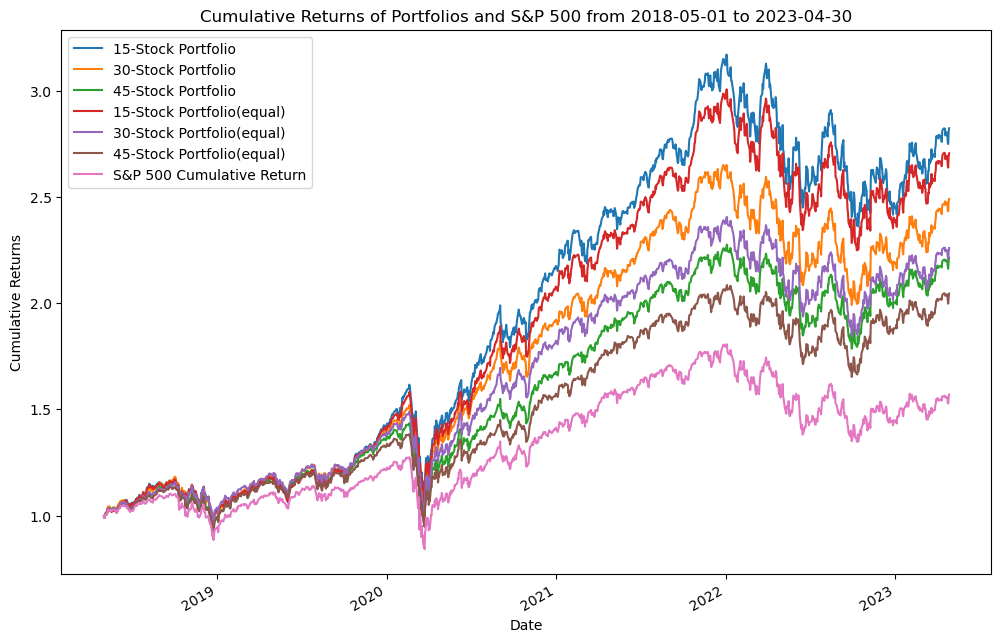

In [42]:
# S&P500 지수와 함께 시각화

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# S&P 500 인덱스 데이터 가져오기
ticker_symbol = '^GSPC'
start_date = '2018-05-01'
end_date = '2023-04-30'
sp500_index_data = yf.download(ticker_symbol, start=start_date, end=end_date)
sp500_index_data['Cumulative Return'] = (sp500_index_data['Close'] / sp500_index_data['Close'].iloc[0]) 

# 포트폴리오 데이터 로드 (이 부분은 이미 로드된 데이터를 가정합니다)

# 인덱스를 DateTimeIndex로 변환
cumulative_returns_15.index = pd.to_datetime(cumulative_returns_15.index)
cumulative_returns_30.index = pd.to_datetime(cumulative_returns_30.index)
cumulative_returns_45.index = pd.to_datetime(cumulative_returns_45.index)  
cumulative_returns_15_equal.index = pd.to_datetime(cumulative_returns_15_equal.index)   
cumulative_returns_30_equal.index = pd.to_datetime(cumulative_returns_30_equal.index)   
cumulative_returns_45_equal.index = pd.to_datetime(cumulative_returns_45_equal.index)  

# 누적 수익률 시각화
plt.figure(figsize=(12, 8))
cumulative_returns_15.plot(label='15-Stock Portfolio')
cumulative_returns_30.plot(label='30-Stock Portfolio')
cumulative_returns_45.plot(label='45-Stock Portfolio')
cumulative_returns_15_equal.plot(label='15-Stock Portfolio(equal)')
cumulative_returns_30_equal.plot(label='30-Stock Portfolio(equal)') 
cumulative_returns_45_equal.plot(label='45-Stock Portfolio(equal)')
plt.plot(sp500_index_data.index, sp500_index_data['Cumulative Return'], label='S&P 500 Cumulative Return')
plt.title('Cumulative Returns of Portfolios and S&P 500 from 2018-05-01 to 2023-04-30')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


<Axes: title={'center': 'Standard Deviations of Portfolios(from 2018-05-01 to 2023-04-30)'}>

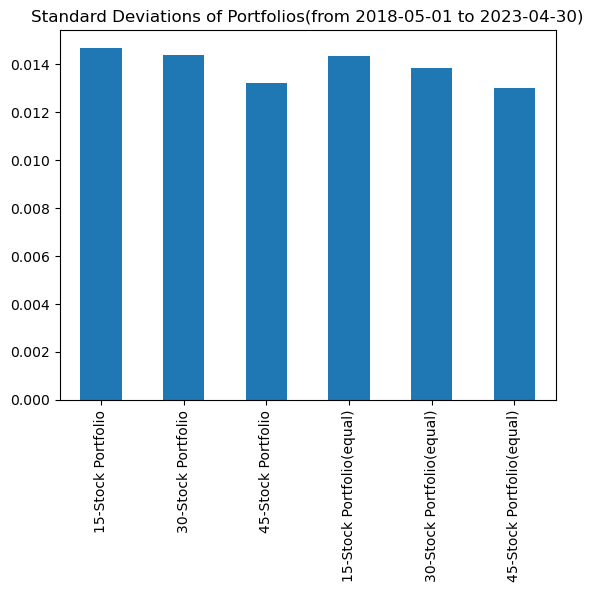

In [45]:
std_dev_15 = portfolio_returns_15.std()
std_dev_30 = portfolio_returns_30.std()
std_dev_45 = portfolio_returns_45.std()
std_dev_15_equal = portfolio_returns_15_equal.std()
std_dev_30_equal = portfolio_returns_30_equal.std()
std_dev_45_equal = portfolio_returns_45_equal.std()

std_devs = pd.Series({
    "15-Stock Portfolio": std_dev_15,
    "30-Stock Portfolio": std_dev_30,
    "45-Stock Portfolio": std_dev_45,
    "15-Stock Portfolio(equal)": std_dev_15_equal,
    "30-Stock Portfolio(equal)": std_dev_30_equal,
    "45-Stock Portfolio(equal)": std_dev_45_equal
})

std_devs.plot(kind='bar', title='Standard Deviations of Portfolios(from 2018-05-01 to 2023-04-30)')

## **GPT-weighted portfolios' cumulative returns (out-of-sample period)**

In [19]:
#15개 자산 pfo

stocks_15 = {
    "AAPL": 0.084,
    "AMZN": 0.074,
    "NVDA": 0.064,
    "JPM": 0.054,
    "PG": 0.054,
    "PFE": 0.064,
    "JNJ": 0.064,
    "KO": 0.054,
    "XOM": 0.064,
    "NEE": 0.074,
    "GOOGL": 0.084,
    "MSFT": 0.084,
    "TSLA": 0.074,
    "NKE": 0.054,
    "BAC": 0.054
}

start_date = '2023-05-01'
end_date = '2023-10-31'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
new_market['pricingDate'] = pd.to_datetime(new_market['pricingDate'])
filtered_data = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data = filtered_data[['pricingDate'] + list(stocks_15.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns = selected_data.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_15 = daily_returns.dot(pd.Series(stocks_15))

# 누적 수익률 계산
cumulative_returns_15 = (1 + portfolio_returns_15).cumprod()

# 마지막 5개 누적 수익률 출력
cumulative_returns_15.tail()


pricingDate
2023-10-04    1.046466
2023-10-05    1.041712
2023-10-06    1.052007
2023-10-09    1.054342
2023-10-10    1.063391
dtype: float64

In [20]:
#30개 자산 pfo

stocks_30 = {
    "MSFT": 0.067,
    "AMZN": 0.067,
    "NVDA": 0.067,
    "AAPL": 0.067,
    "GOOGL": 0.067,
    "ADBE": 0.067,
    "JNJ": 0.05,
    "PFE": 0.05,
    "MRK": 0.05,
    "ABT": 0.05,
    "PG": 0.05,
    "KO": 0.05,
    "JPM": 0.05,
    "GS": 0.05,
    "CAT": 0.025,
    "CVX": 0.025,
    "XOM": 0.025,
    "BA": 0.025,
    "TSLA": 0.025,
    "NEE": 0.025,
    "NKE": 0.005,
    "VZ": 0.005,
    "CRM": 0.005,
    "UNH": 0.005,
    "WMT": 0.005,
    "QCOM": 0.005,
    "BAC": 0.005,
    "V": 0.005,
    "MCD": 0.005,
    "INTC": 0.005
}


start_date = '2023-05-01'
end_date = '2023-10-31'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
filtered_data_30 = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data_30 = filtered_data_30[['pricingDate'] + list(stocks_30.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data_30.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns_30 = selected_data_30.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_30 = daily_returns_30.dot(pd.Series(stocks_30))

# 누적 수익률 계산
cumulative_returns_30 = (1 + portfolio_returns_30).cumprod()

# 마지막 5개 누적 수익률 출력
cumulative_returns_30.tail()

pricingDate
2023-10-04    1.066189
2023-10-05    1.064301
2023-10-06    1.075549
2023-10-09    1.078936
2023-10-10    1.085316
dtype: float64

In [21]:
# 45개 자산 pfo

stocks_45 = {
    "AAPL": 0.05, "GOOGL": 0.04, "MSFT": 0.04, "NVDA": 0.03, "AMD": 0.03, "ORCL": 0.02, "CRM": 0.02, "INTC": 0.01, "CSCO": 0.01,
    "JPM": 0.04, "GS": 0.03, "BAC": 0.03, "MS": 0.02, "AXP": 0.02, "C": 0.01,
    "JNJ": 0.03, "UNH": 0.03, "PFE": 0.02, "ABBV": 0.02, "MRK": 0.02, "AMGN": 0.02, "GILD": 0.01,
    "PG": 0.03, "KO": 0.03, "NKE": 0.02, "PEP": 0.02, "COST": 0.02, "WMT": 0.02, "TGT": 0.01,
    "XOM": 0.025, "CVX": 0.025, "NEE": 0.02, "DUK": 0.01, "SO": 0.01, "SLB": 0.01,
    "MMM": 0.02, "CAT": 0.02, "HON": 0.02, "GE": 0.02, "ADP": 0.02,
    "AMZN": 0.02, "META": 0.02, "HD": 0.02, "VZ": 0.01, "MRK": 0.01
}

start_date = '2023-05-01'
end_date = '2023-10-31'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
filtered_data_45 = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data_45 = filtered_data_45[['pricingDate'] + list(stocks_45.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data_45.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns_45 = selected_data_45.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_45 = daily_returns_45.dot(pd.Series(stocks_45))

# 누적 수익률 계산
cumulative_returns_45 = (1 + portfolio_returns_45).cumprod()

# 마지막 5개 누적 수익률 출력
cumulative_returns_45.tail()

pricingDate
2023-10-04    1.020990
2023-10-05    1.017693
2023-10-06    1.028368
2023-10-09    1.033321
2023-10-10    1.040106
dtype: float64

## **Equally-weighted (GPT-weighted) portfolios' cumulative returns (Out-of-sample period)**

In [22]:
#15개 자산 pfo_equal

stocks_15_equal = {
    "AAPL": 0.06666666666666667,
    "AMZN": 0.06666666666666667,
    "NVDA": 0.06666666666666667,
    "JPM": 0.06666666666666667,
    "PG": 0.06666666666666667,
    "PFE": 0.06666666666666667,
    "JNJ": 0.06666666666666667,
    "KO": 0.06666666666666667,
    "XOM": 0.06666666666666667,
    "NEE": 0.06666666666666667,
    "GOOGL": 0.06666666666666667,
    "MSFT": 0.06666666666666667,
    "TSLA": 0.06666666666666667,
    "NKE": 0.06666666666666667,
    "BAC": 0.06666666666666667
}

start_date = '2023-05-01'
end_date = '2023-10-31'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
filtered_data_15_equal = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data_15_equal = filtered_data_15_equal[['pricingDate'] + list(stocks_15_equal.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data_15_equal.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns_15_equal = selected_data_15_equal.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_15_equal = daily_returns_15_equal.dot(pd.Series(stocks_15_equal))

# 누적 수익률 계산
cumulative_returns_15_equal = (1 + portfolio_returns_15_equal).cumprod()

# 마지막 5개 누적 수익률 출력
cumulative_returns_15_equal.tail()

pricingDate
2023-10-04    1.031763
2023-10-05    1.026513
2023-10-06    1.035971
2023-10-09    1.038032
2023-10-10    1.047551
dtype: float64

In [24]:
#30개 자산 pfo_equal

stocks_30_equal = {
    "MSFT": 0.03333333333333333,
    "AMZN": 0.03333333333333333,
    "NVDA": 0.03333333333333333,
    "AAPL": 0.03333333333333333,
    "GOOGL": 0.03333333333333333,
    "ADBE": 0.03333333333333333,
    "JNJ": 0.03333333333333333,
    "PFE": 0.03333333333333333,
    "MRK": 0.03333333333333333,
    "ABT": 0.03333333333333333,
    "PG": 0.03333333333333333,
    "KO": 0.03333333333333333,
    "JPM": 0.03333333333333333,
    "GS": 0.03333333333333333,
    "CAT": 0.03333333333333333,
    "CVX": 0.03333333333333333,
    "XOM": 0.03333333333333333,
    "BA": 0.03333333333333333,
    "TSLA": 0.03333333333333333,
    "NEE": 0.03333333333333333,
    "NKE": 0.03333333333333333,
    "VZ": 0.03333333333333333,
    "CRM": 0.03333333333333333,
    "UNH": 0.03333333333333333,
    "WMT": 0.03333333333333333,
    "QCOM": 0.03333333333333333,
    "BAC": 0.03333333333333333,
    "V": 0.03333333333333333,
    "MCD": 0.03333333333333333,
    "INTC": 0.03333333333333333
}



start_date = '2023-05-01'
end_date = '2023-10-31'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
filtered_data_30_equal = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data_30_equal = filtered_data_30_equal[['pricingDate'] + list(stocks_30_equal.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data_30_equal.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns_30_equal = selected_data_30_equal.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_30_equal = daily_returns_30_equal.dot(pd.Series(stocks_30_equal))

# 누적 수익률 계산
cumulative_returns_30_equal = (1 + portfolio_returns_30_equal).cumprod()

# 마지막 5개 누적 수익률 출력
cumulative_returns_30_equal.tail()

pricingDate
2023-10-04    1.022118
2023-10-05    1.019922
2023-10-06    1.027247
2023-10-09    1.031379
2023-10-10    1.039253
dtype: float64

In [25]:
# 45개 자산 pfo_equal

stocks_45_equal = {
    "AAPL": 0.022222,
    "GOOGL": 0.022222,
    "MSFT": 0.022222,
    "NVDA": 0.022222,
    "AMD": 0.022222,
    "ORCL": 0.022222,
    "CRM": 0.022222,
    "INTC": 0.022222,
    "CSCO": 0.022222,
    "JPM": 0.022222,
    "GS": 0.022222,
    "BAC": 0.022222,
    "MS": 0.022222,
    "AXP": 0.022222,
    "C": 0.022222,
    "JNJ": 0.022222,
    "UNH": 0.022222,
    "PFE": 0.022222,
    "ABBV": 0.022222,
    "MRK": 0.022222,
    "AMGN": 0.022222,
    "GILD": 0.022222,
    "PG": 0.022222,
    "KO": 0.022222,
    "NKE": 0.022222,
    "PEP": 0.022222,
    "COST": 0.022222,
    "WMT": 0.022222,
    "TGT": 0.022222,
    "XOM": 0.022222,
    "CVX": 0.022222,
    "NEE": 0.022222,
    "DUK": 0.022222,
    "SO": 0.022222,
    "SLB": 0.022222,
    "MMM": 0.022222,
    "CAT": 0.022222,
    "HON": 0.022222,
    "GE": 0.022222,
    "ADP": 0.022222,
    "AMZN": 0.022222,
    "META": 0.022222,
    "HD": 0.022222,
    "VZ": 0.022222,
    "MRK": 0.022222,

}

start_date = '2023-05-01'
end_date = '2023-10-31'

# 데이터 전처리: 날짜 필터링 및 필요한 종목만 선택
filtered_data_45_equal = new_market[(new_market['pricingDate'] >= start_date) & (new_market['pricingDate'] <= end_date)]
selected_data_45_equal = filtered_data_45_equal[['pricingDate'] + list(stocks_45_equal.keys())]

# 'pricingDate' 열을 인덱스로 설정
selected_data_45_equal.set_index('pricingDate', inplace=True)

# 각 주식의 일일 수익률 계산
daily_returns_45_equal = selected_data_45_equal.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_45_equal = daily_returns_45_equal.dot(pd.Series(stocks_45_equal))

# 누적 수익률 계산
cumulative_returns_45_equal = (1 + portfolio_returns_45_equal).cumprod()

# 마지막 5개 누적 수익률 출력
cumulative_returns_45_equal.tail()

pricingDate
2023-10-04    1.004806
2023-10-05    1.001117
2023-10-06    1.010512
2023-10-09    1.016435
2023-10-10    1.024113
dtype: float64

[*********************100%%**********************]  1 of 1 completed


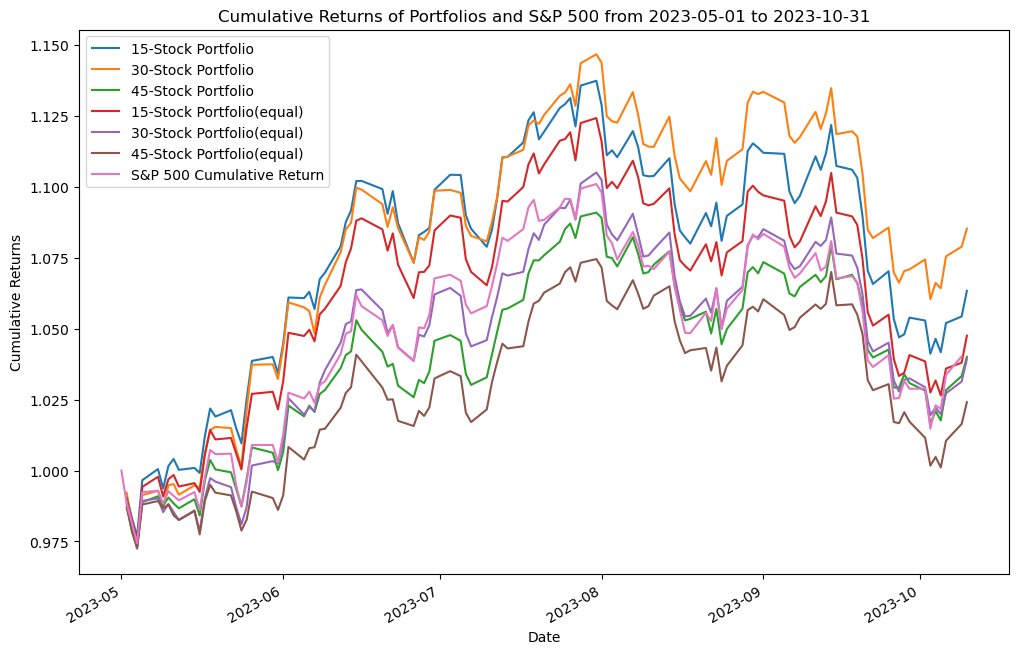

In [28]:
# S&P500 지수와 함께 시각화

# S&P 500 인덱스 데이터 가져오기
ticker_symbol = '^GSPC'
start_date = '2023-05-01'
end_date = '2023-10-10'
sp500_index_data = yf.download(ticker_symbol, start=start_date, end=end_date)
sp500_index_data['Cumulative Return'] = (sp500_index_data['Close'] / sp500_index_data['Close'].iloc[0])

# 인덱스를 DateTimeIndex로 변환
cumulative_returns_15.index = pd.to_datetime(cumulative_returns_15.index)
cumulative_returns_30.index = pd.to_datetime(cumulative_returns_30.index)
cumulative_returns_45.index = pd.to_datetime(cumulative_returns_45.index)  

cumulative_returns_15_equal.index = pd.to_datetime(cumulative_returns_15_equal.index)   
cumulative_returns_30_equal.index = pd.to_datetime(cumulative_returns_30_equal.index)   
cumulative_returns_45_equal.index = pd.to_datetime(cumulative_returns_45_equal.index)  

# 누적 수익률 시각화
plt.figure(figsize=(12, 8))
cumulative_returns_15.plot(label='15-Stock Portfolio')
cumulative_returns_30.plot(label='30-Stock Portfolio')
cumulative_returns_45.plot(label='45-Stock Portfolio')
cumulative_returns_15_equal.plot(label='15-Stock Portfolio(equal)')
cumulative_returns_30_equal.plot(label='30-Stock Portfolio(equal)') 
cumulative_returns_45_equal.plot(label='45-Stock Portfolio(equal)') 
plt.plot(sp500_index_data.index, sp500_index_data['Cumulative Return'], label='S&P 500 Cumulative Return')
plt.title('Cumulative Returns of Portfolios and S&P 500 from 2023-05-01 to 2023-10-31')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()